### Project Title: Exploring Customer Churn in a Telecom Company

### Compiled by: MASHELE GIVEN PHAZAMISA

## Context:
Project Description: 
A telecom company is interested in exploring customer churn, 
which is the rate at which customers leave their service. The company has provided a 
dataset with information on customer demographics, services subscribed to, and 
usage patterns, among other things. 
## Objective:
The goal of this project is to analyze this dataset, perform data cleaning and preprocessing, conduct feature selection and 
extraction, and visualize the data in order to identify factors that may be driving 
customer churn

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To impute missing values
from sklearn.impute import SimpleImputer
# To be used for one hot encoding
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import time

## Data Overview

In [2]:
# Load the Telecom dataset into Pandas DataFrame
data=pd.read_csv("telco_churn.csv")  

In [3]:
data.head()    # code to print the first five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [4]:
data.tail()  # Code to print the last five rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,No


In [5]:
data.shape  # Code to print the dimensions of the dataset

(7043, 20)

In [6]:
print(f"The Telecom dataset consists of {data.shape[0]} rows and {data.shape[1]} columns")

The Telecom dataset consists of 7043 rows and 20 columns


#### Observation:
The Telecom dataset consist of 7043 rows and 20 columns

In [7]:
data.info()  # Code to print the data types of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observation:
The Telecom dataset contain 20 columns with , 17 object types,two(2) integer types and  one(1) floating data type. <br>
The dataset memory usage is 1.1 MB(megabytes)


In [7]:
data.describe().T   # Code to print the statistical summary of the numerical dataset 

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### Observation:
The seniorCitizen data exhibit a skewed to the right distribution with  mean greater than the median. <br>
The tenure dataset range from a minimum of 0.00 to a maximum of 72 with mean greater than the median. <br>
About 75% of the dataset has monthly charges that are from 89,85 and above. 

In [8]:
data.isnull().sum()  # Code to check for null values in the dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

### Observation:
No missing values present in the dataset

In [9]:
data.duplicated().sum() # Code to check for duplicates in the dataset

0

### Observation:
No duplicates present in the dataset

## Exploratory Data Analysis (EDA)

### Univariate analysis

#### Numerical data analysis

In [12]:
# Select numerical colums from the dataset
numerical_columns =data.select_dtypes("number").columns

In [15]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Histogram for {item}")      # Give the graph a title
    plt.xlabel(item)  # change the label on the x-axis
    plt.ylabel("frequency")  # change the label on the y-axis
    sns.histplot(data=data,x=item,kde=True);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Boxplot for {item}")          # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);  # Boxplot for numerical dataset
    plt.xlabel(item)                     # change the label on the x-axis
    plt.show()

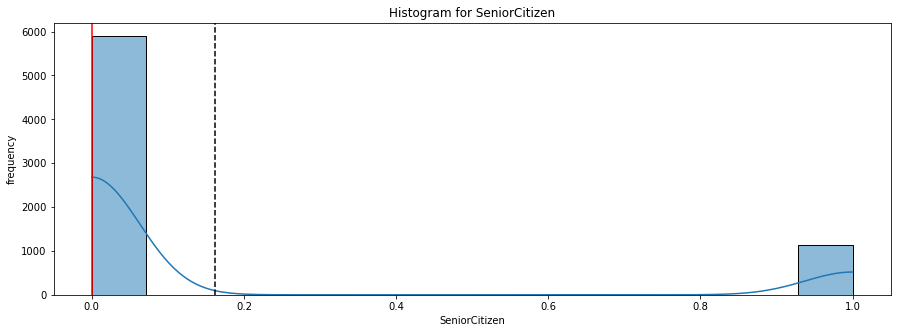

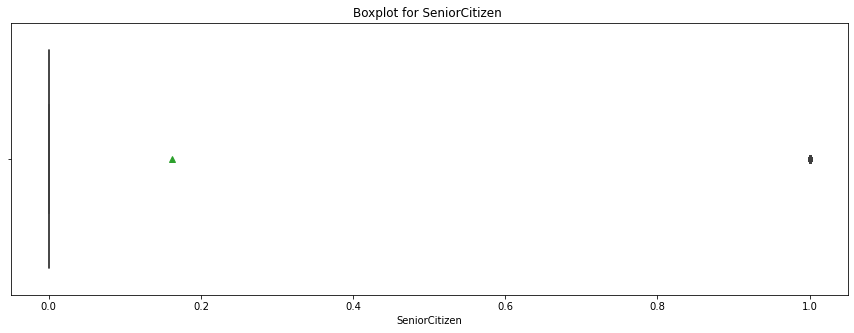

In [17]:
box_histplot(data,numerical_columns[0])    # code to call the function to display the histogram and boxplot

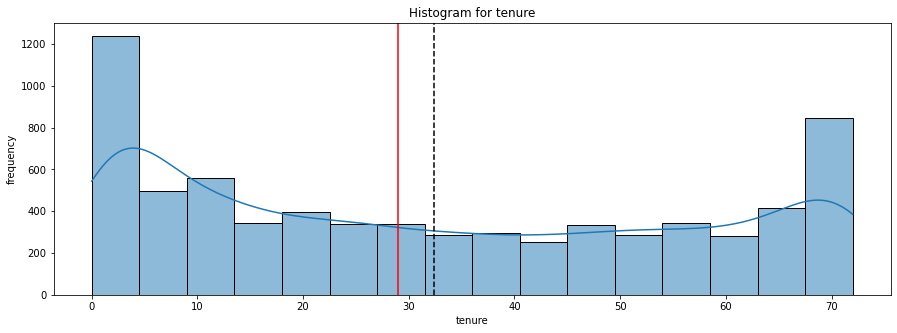

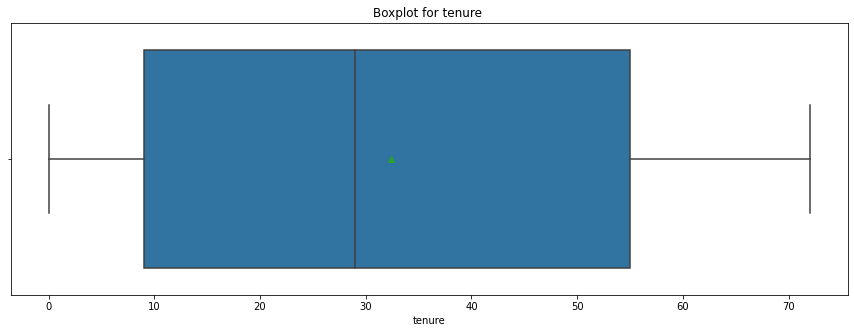

In [19]:
box_histplot(data,numerical_columns[1])

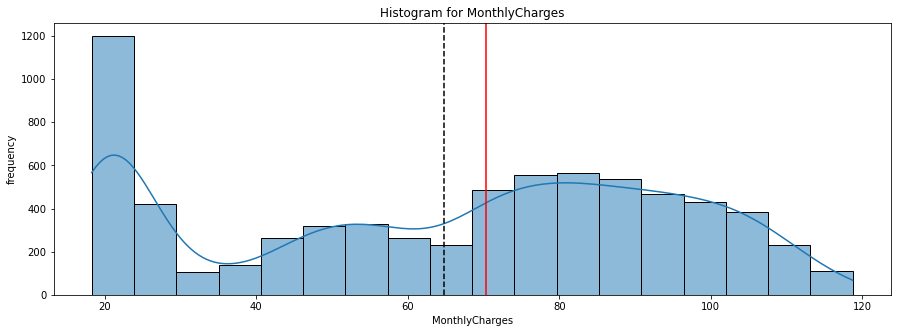

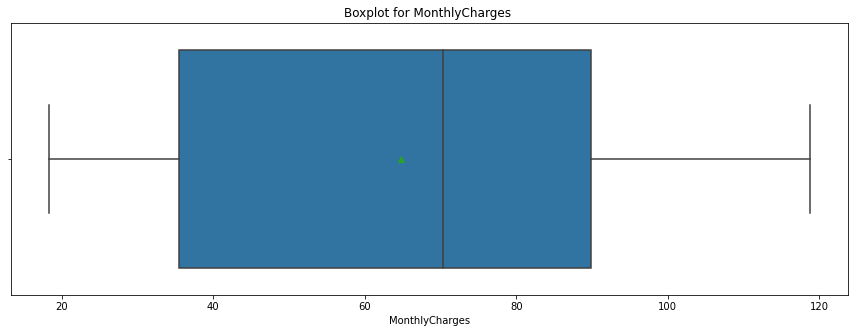

In [20]:
box_histplot(data,numerical_columns[2])

### Categorical data analysis

In [42]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(8,5))  # increase the size of the plot
    sns.countplot(data=data , x=item); # countplot for categorical columns
    plt.title(f"Countplot for {item}")  # add the title on the countplot
    plt.ylabel("frequency")    # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

In [76]:
categorical_data = data.select_dtypes("object").columns   # code to select categorical columns

In [77]:
categorical_data

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

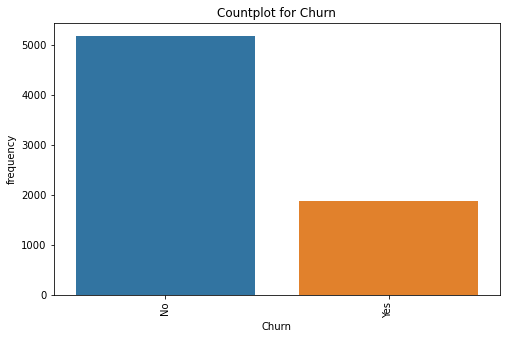

In [43]:
count_plot(data,categorical_data[16])  # call the countplot function to display the bar graphs 

In [39]:
data["Churn"].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

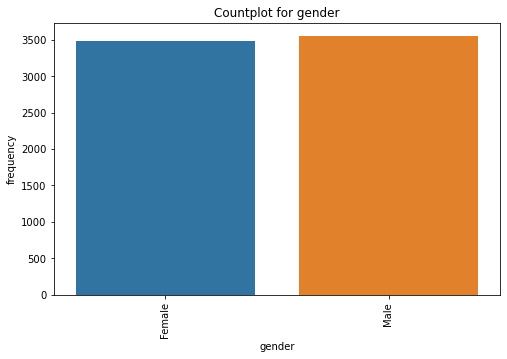

In [44]:
count_plot(data,categorical_data[1])

In [45]:
data[categorical_data[1]].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

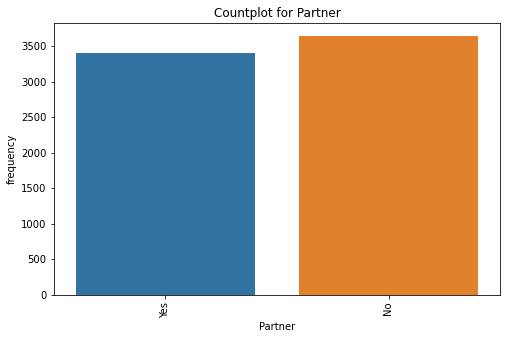

In [47]:
count_plot(data,categorical_data[2])

In [49]:
data[categorical_data[2]].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

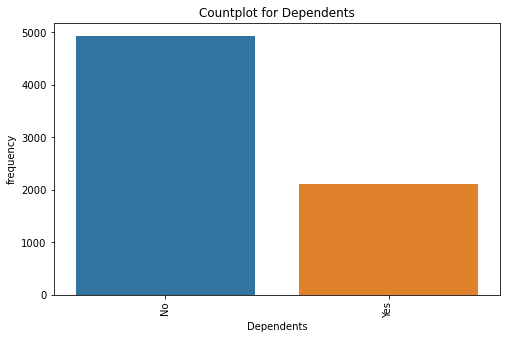

In [50]:
count_plot(data,categorical_data[3])

In [51]:
data[categorical_data[3]].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

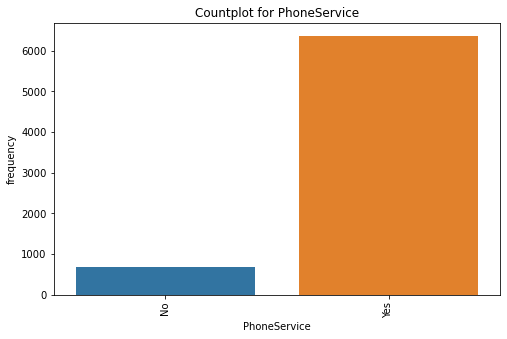

In [52]:
count_plot(data,categorical_data[4])

In [53]:
data[categorical_data[4]].value_counts(normalize=True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

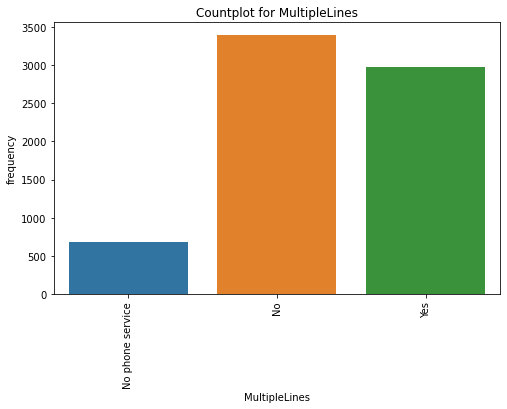

In [54]:
count_plot(data,categorical_data[5])

In [55]:
data[categorical_data[5]].value_counts(normalize=True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

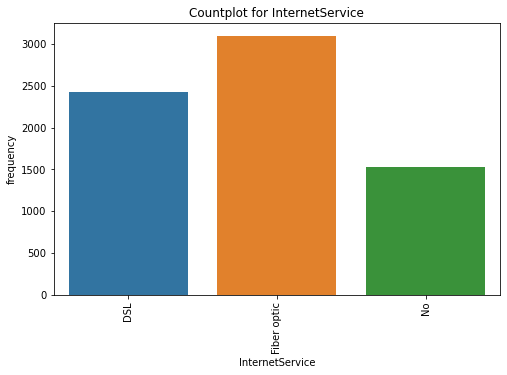

In [56]:
count_plot(data,categorical_data[6])

In [57]:
data[categorical_data[6]].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

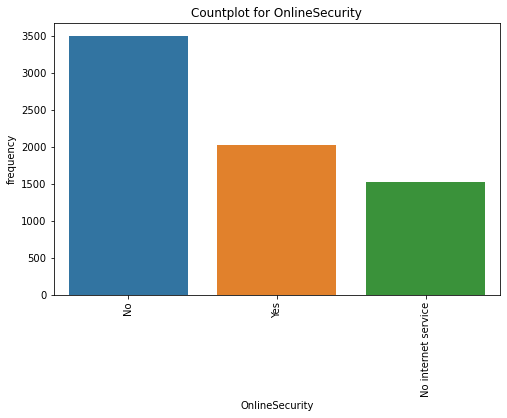

In [58]:
count_plot(data,categorical_data[7])

In [59]:
data[categorical_data[7]].value_counts(normalize=True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

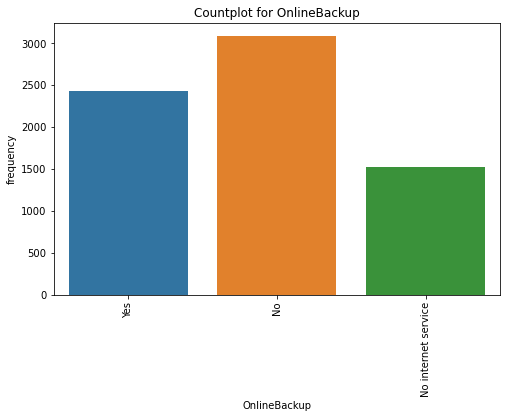

In [60]:
count_plot(data,categorical_data[8])

In [61]:
data[categorical_data[8]].value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

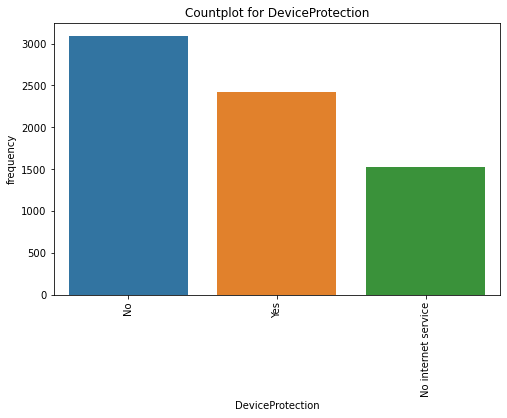

In [62]:
count_plot(data,categorical_data[9])

In [63]:
data[categorical_data[9]].value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

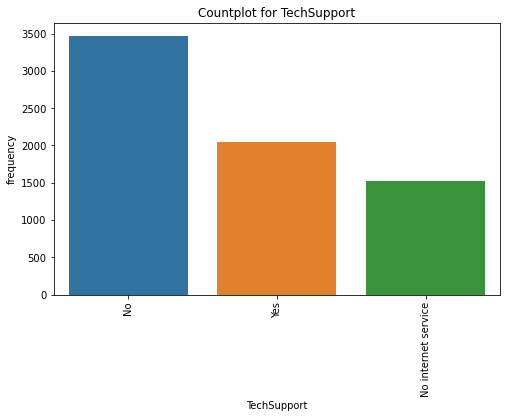

In [64]:
count_plot(data,categorical_data[10])

In [65]:
data[categorical_data[10]].value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

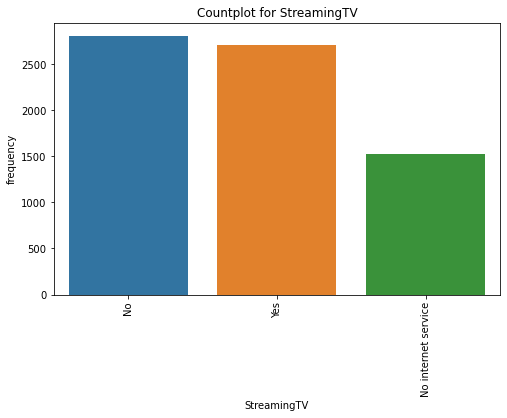

In [66]:
count_plot(data,categorical_data[11])

In [67]:
data[categorical_data[11]].value_counts(normalize=True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

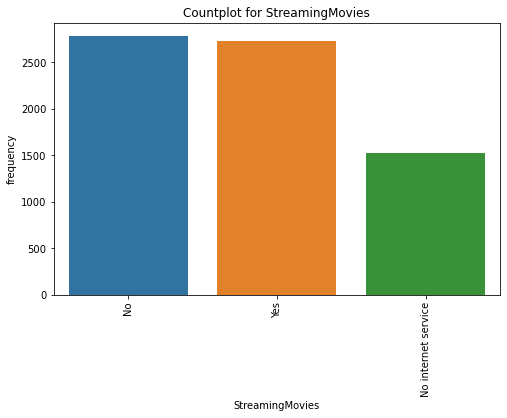

In [68]:
count_plot(data,categorical_data[12])

In [69]:
data[categorical_data[12]].value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

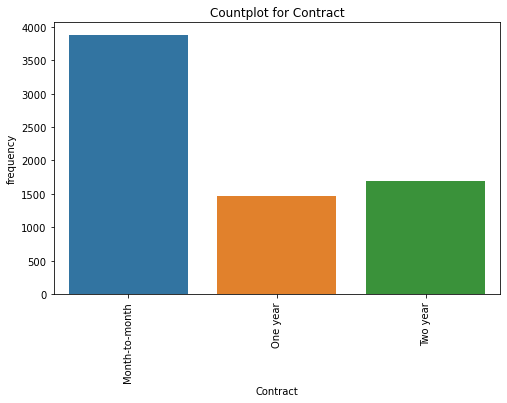

In [70]:
count_plot(data,categorical_data[13])

In [71]:
data[categorical_data[13]].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

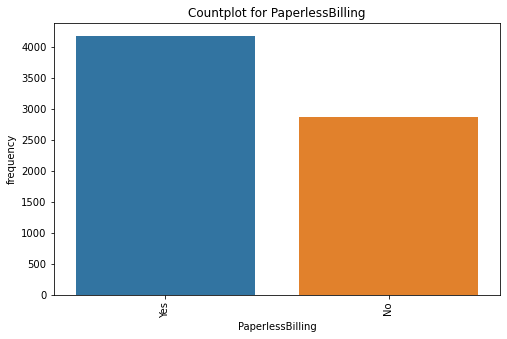

In [72]:
count_plot(data,categorical_data[14])

In [73]:
data[categorical_data[14]].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

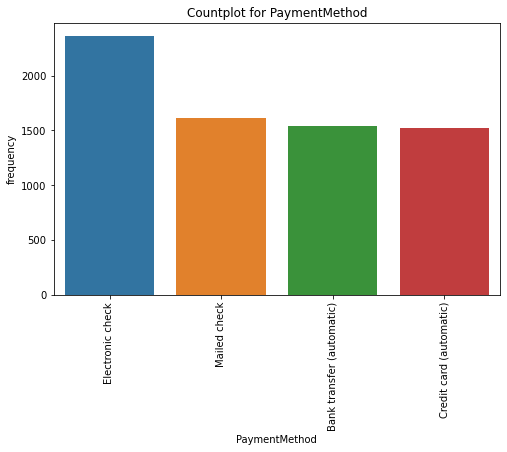

In [74]:
count_plot(data,categorical_data[15])

In [75]:
data[categorical_data[15]].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

### Bivariate analysis

#### Categorical and Numerical data analysis

In [91]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))  # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

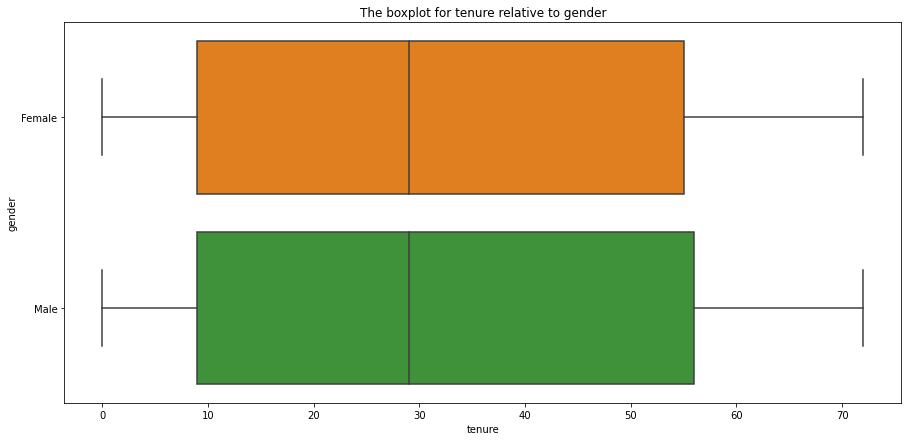

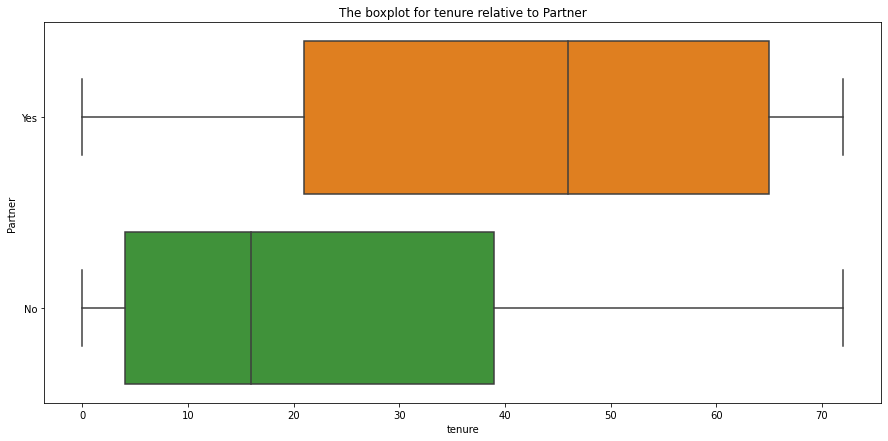

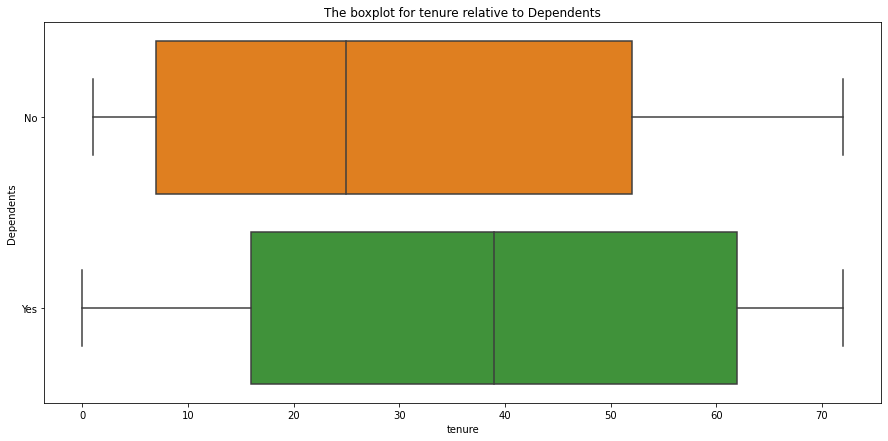

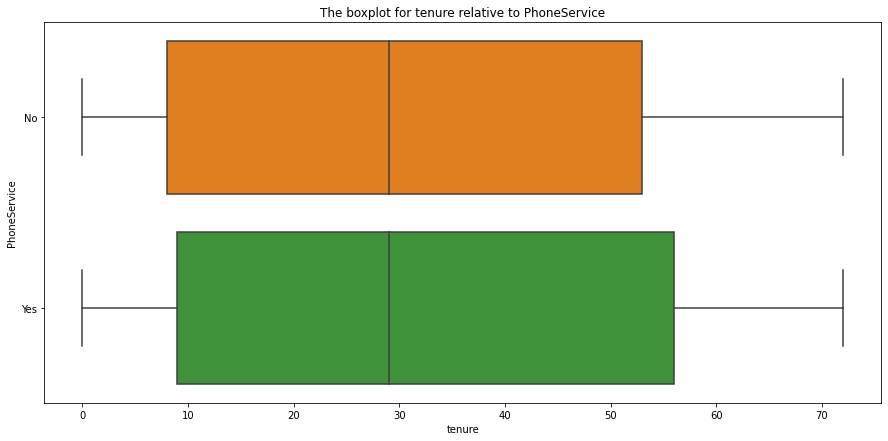

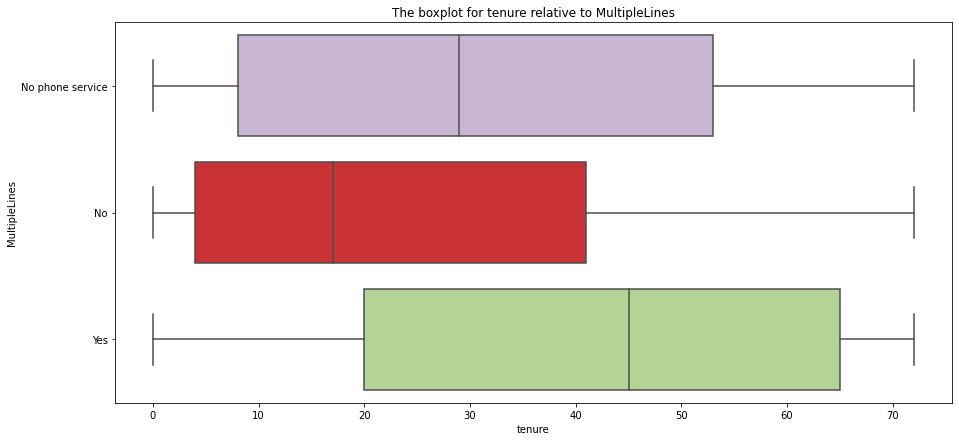

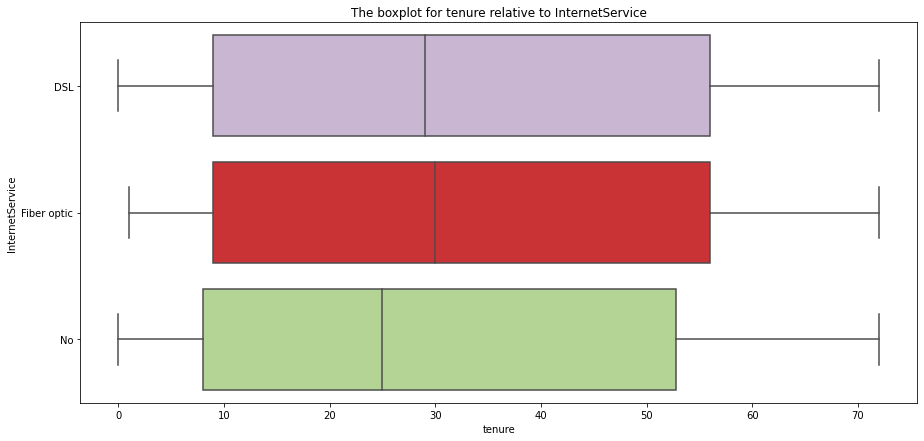

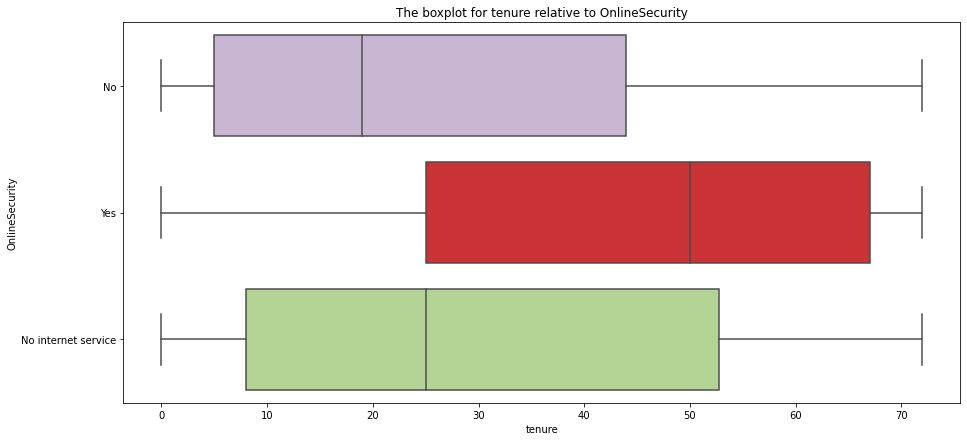

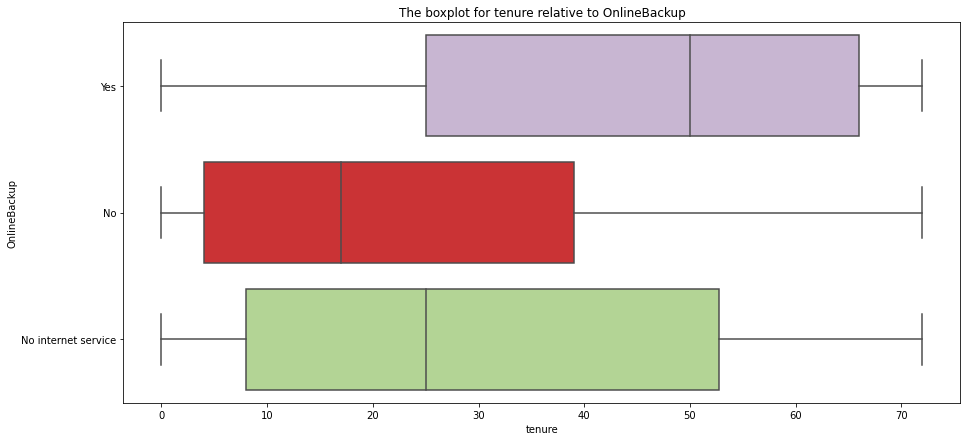

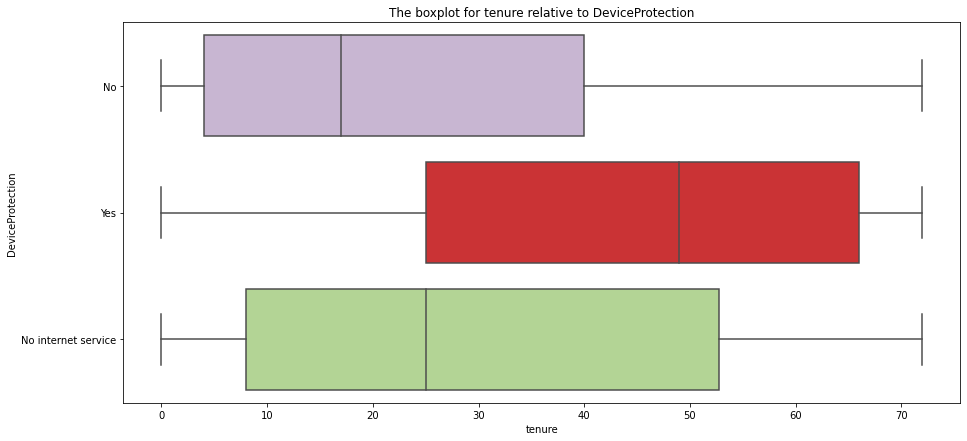

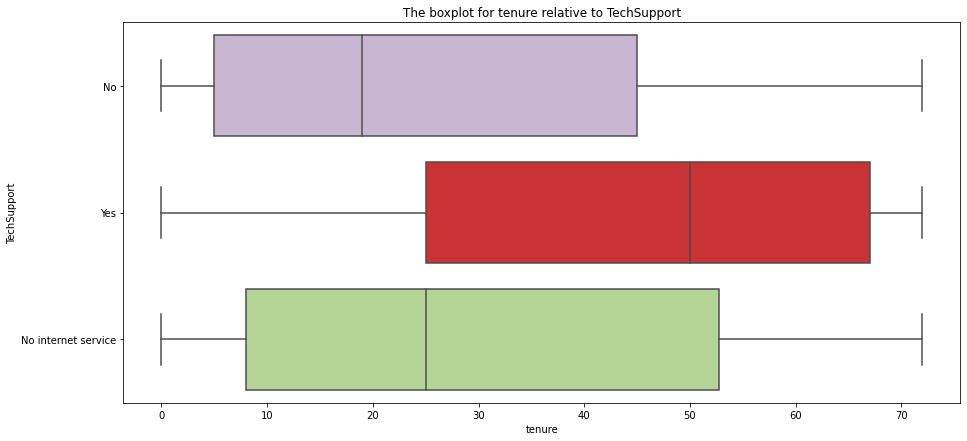

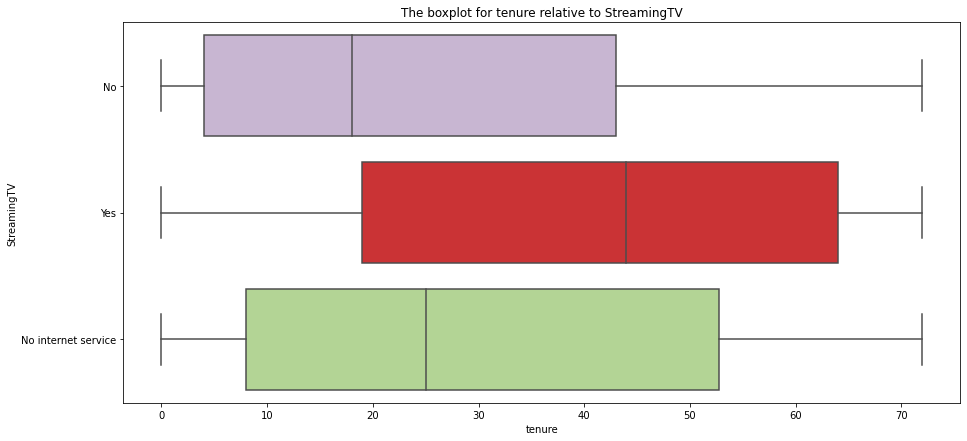

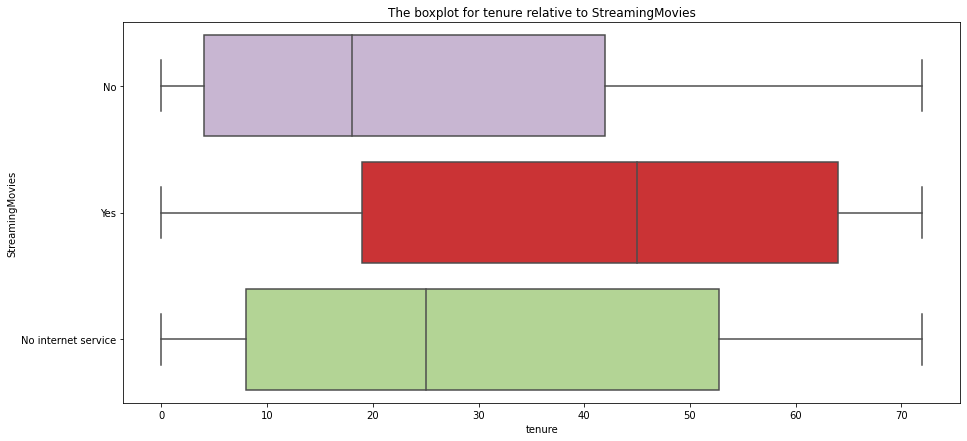

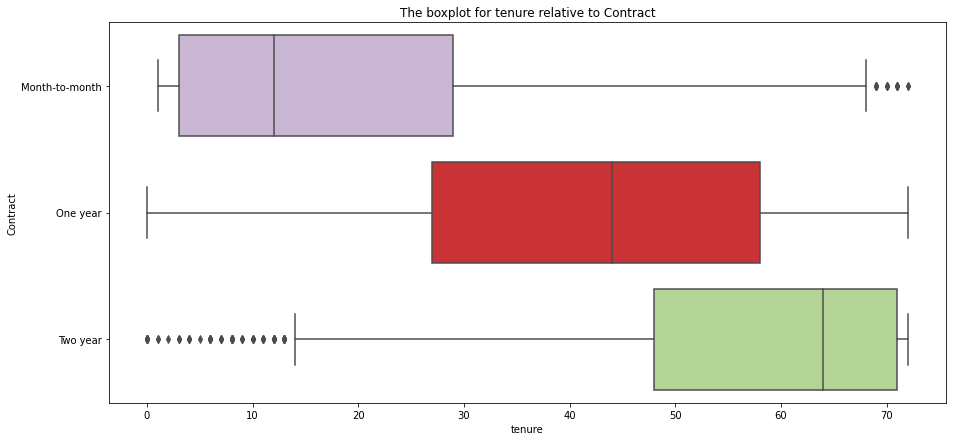

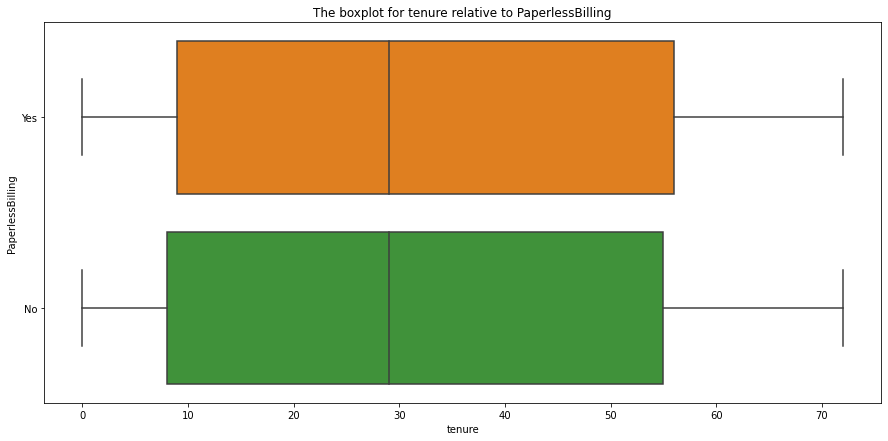

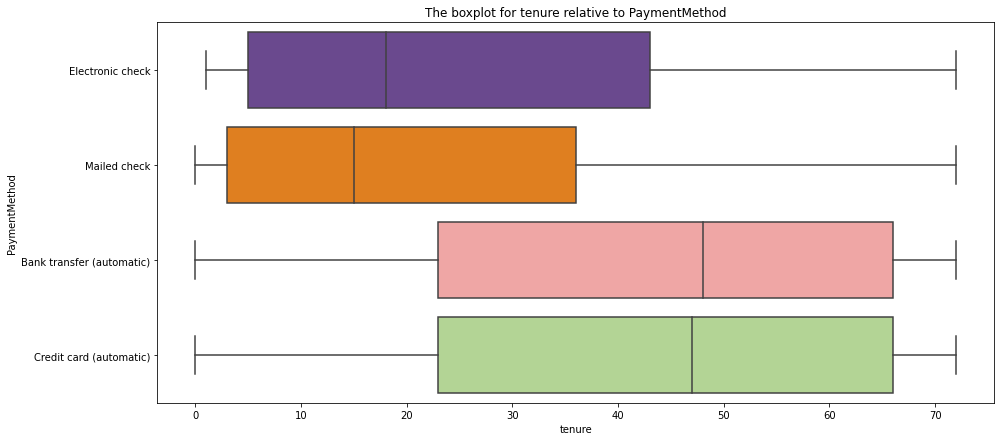

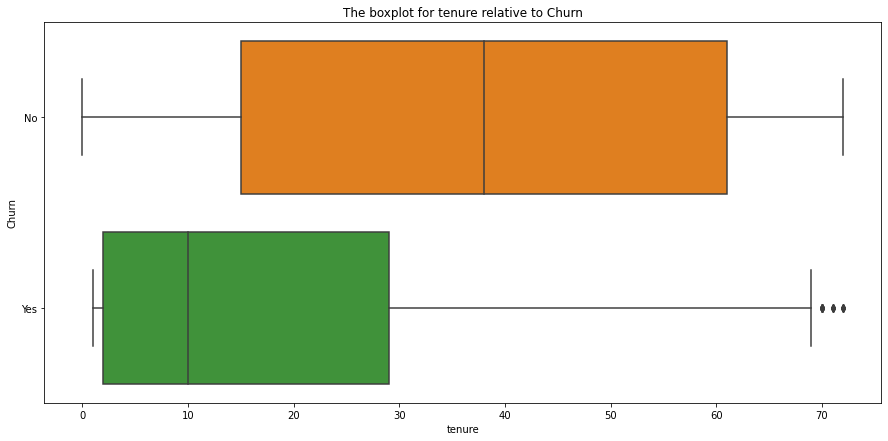

In [92]:
for variable in categorical_data[1:]:
    box_plot(data,numerical_columns[1],variable)

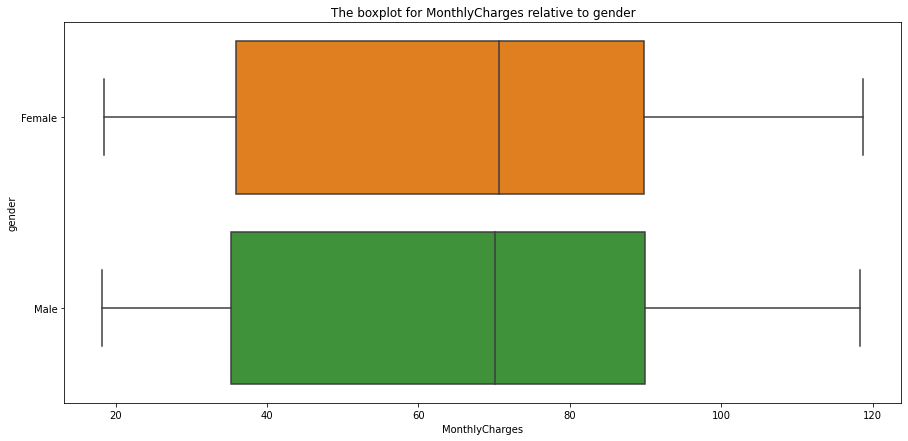

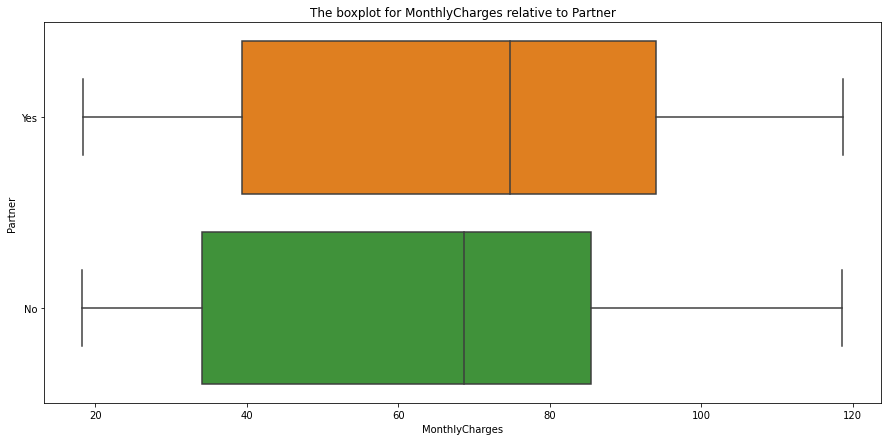

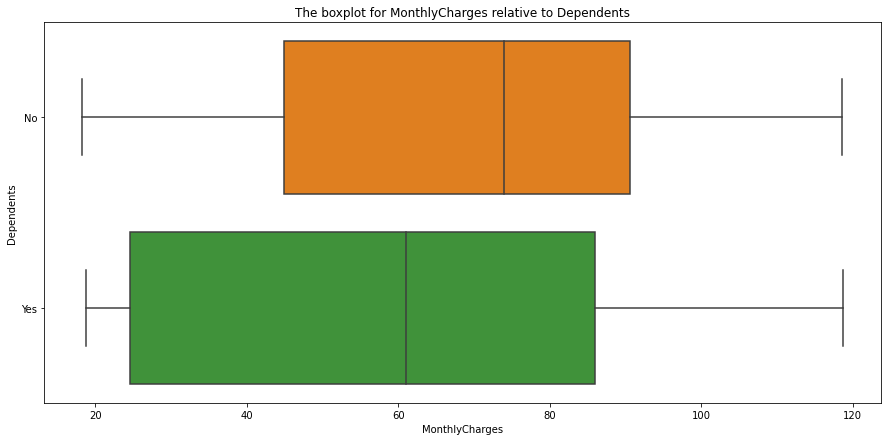

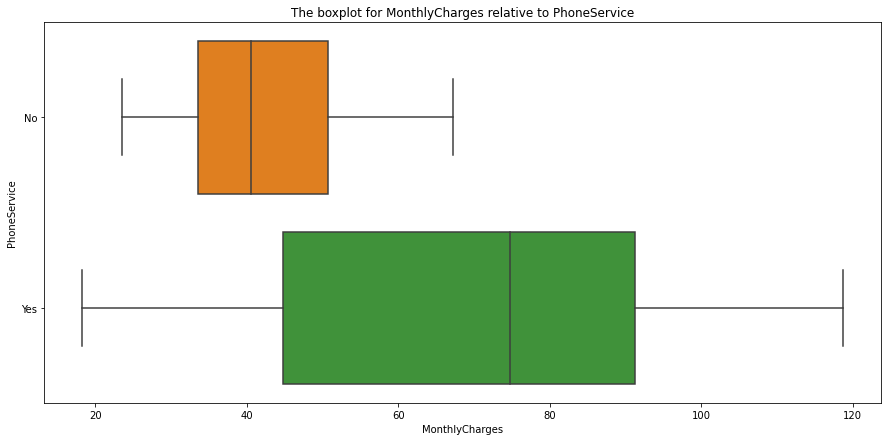

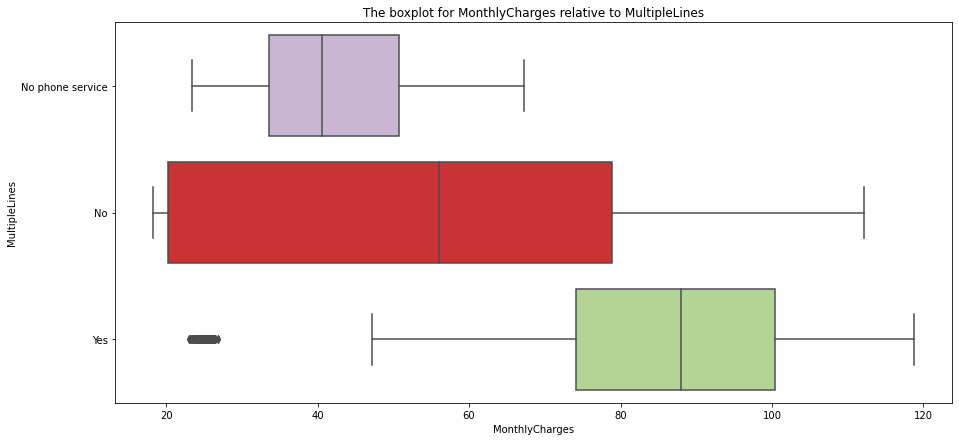

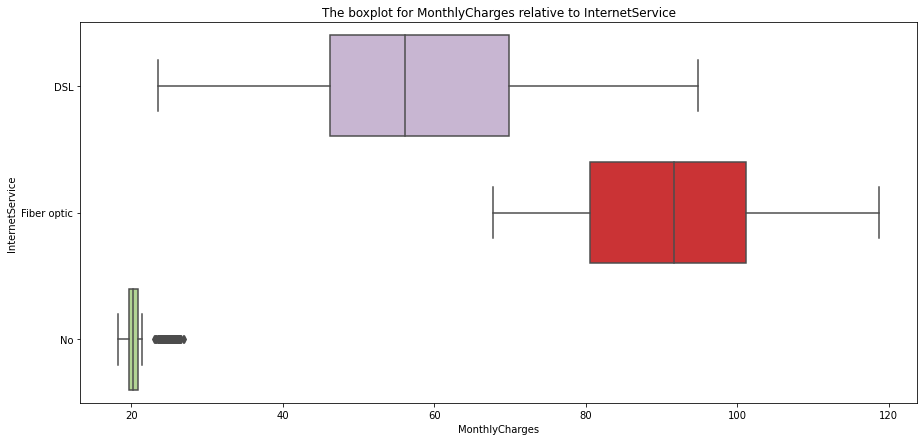

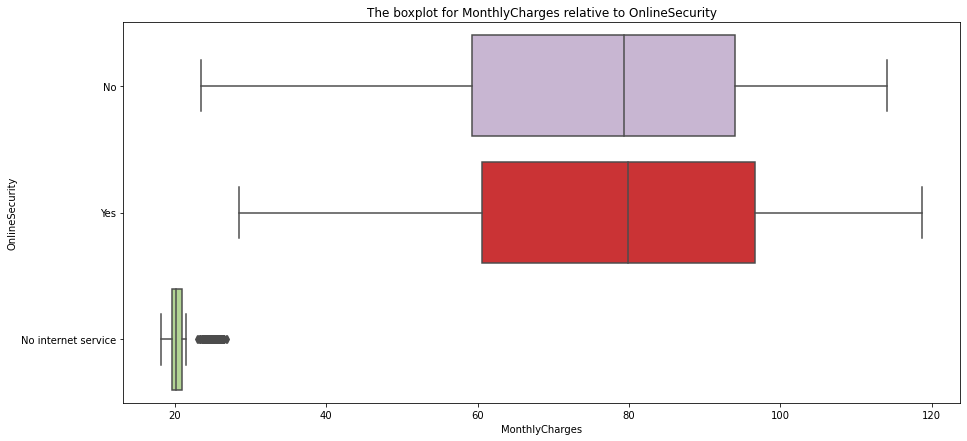

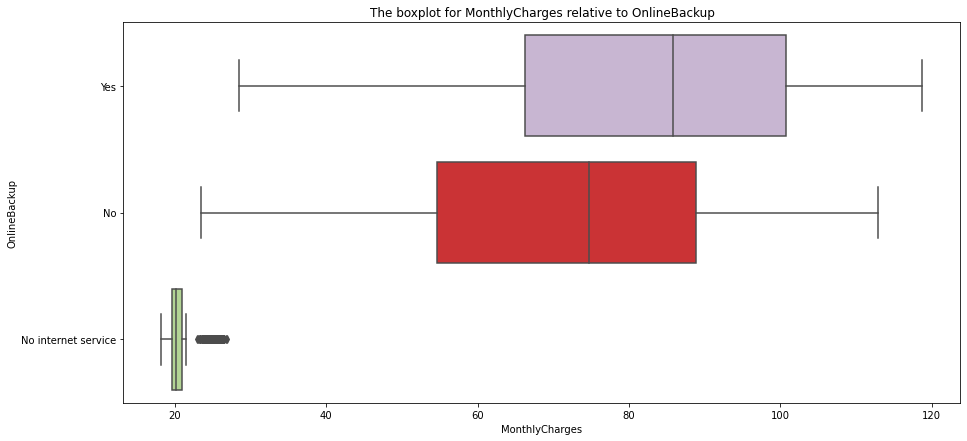

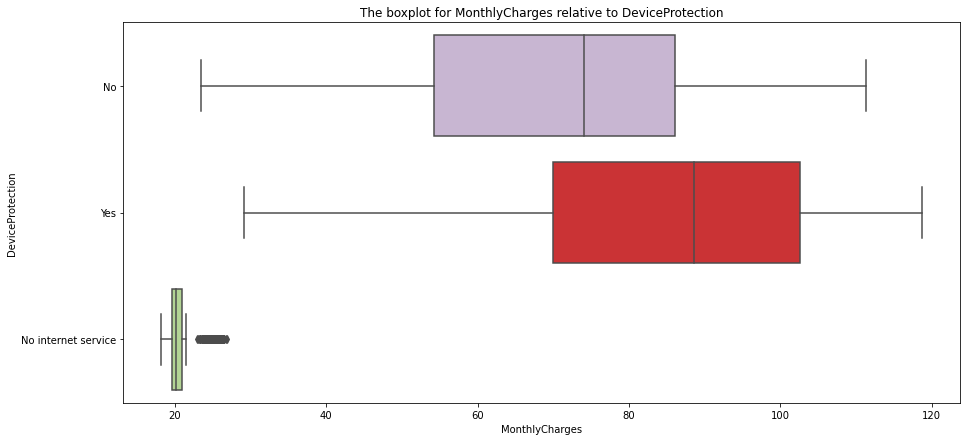

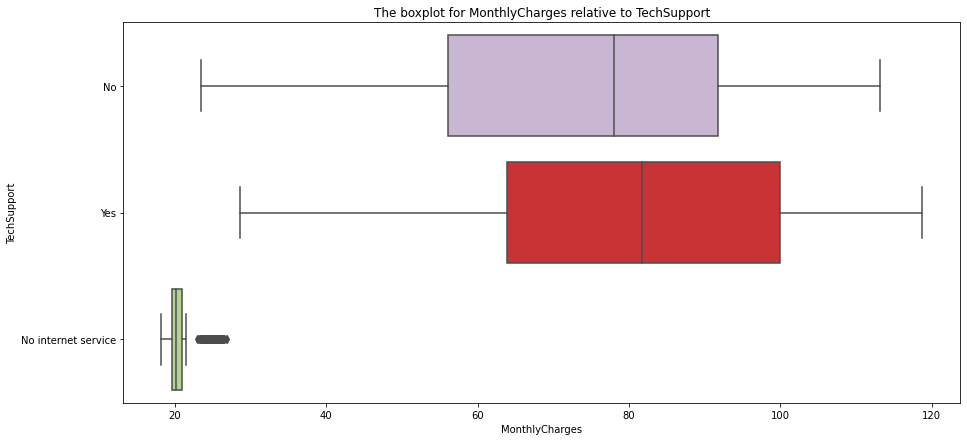

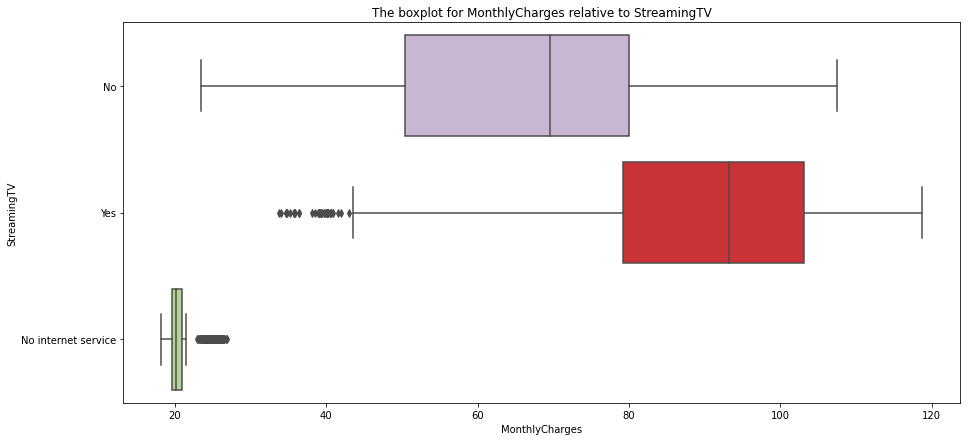

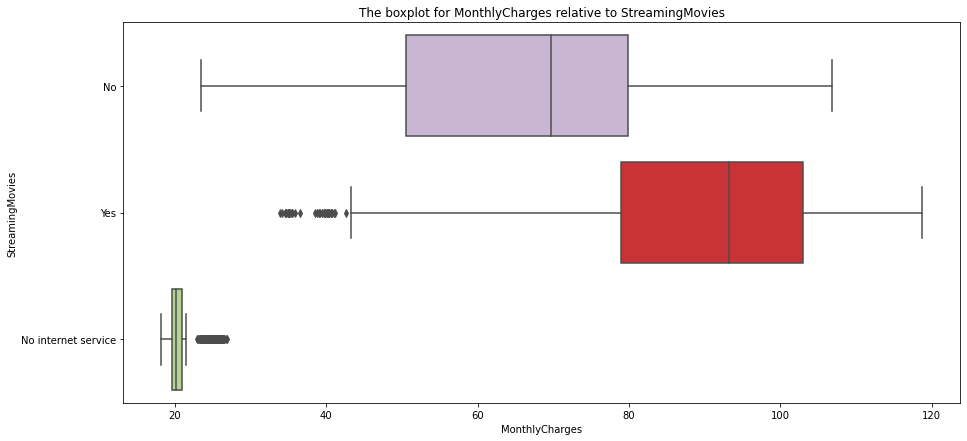

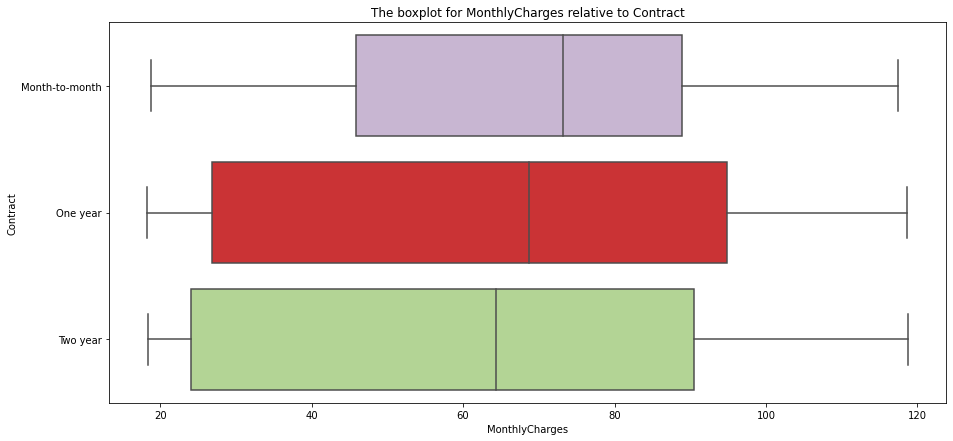

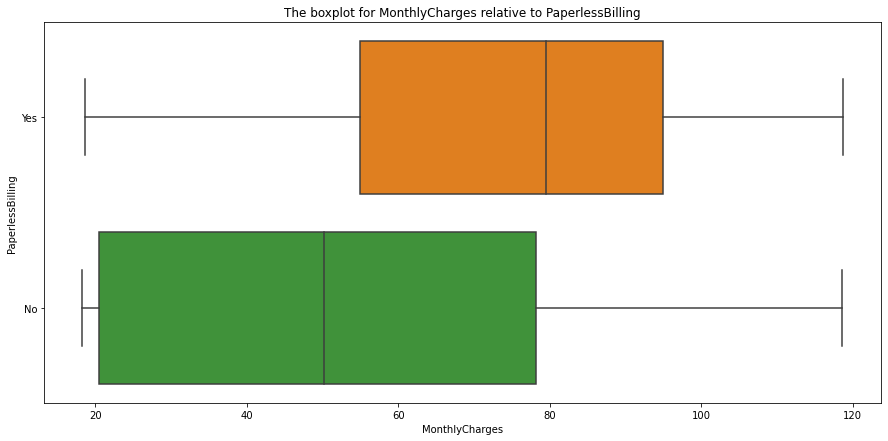

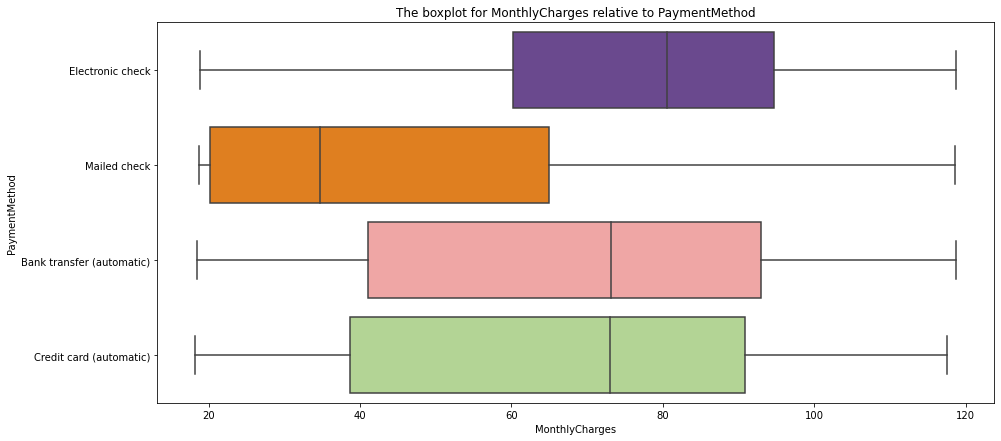

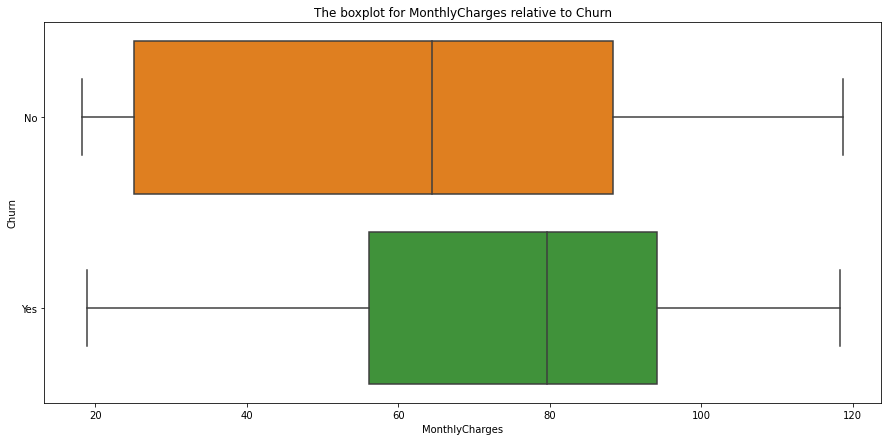

In [93]:
for variable in categorical_data[1:]:
    box_plot(data,numerical_columns[2],variable)

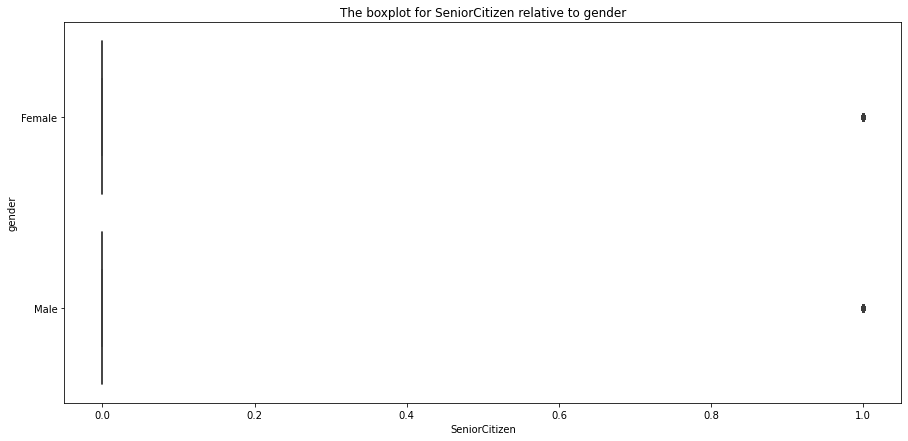

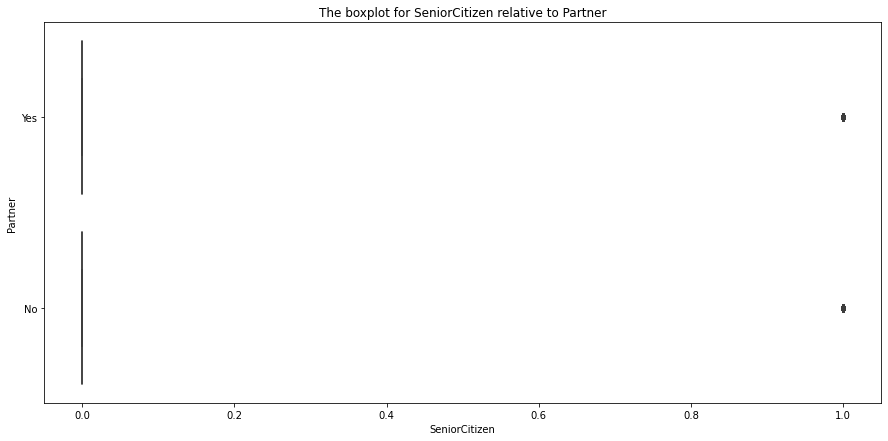

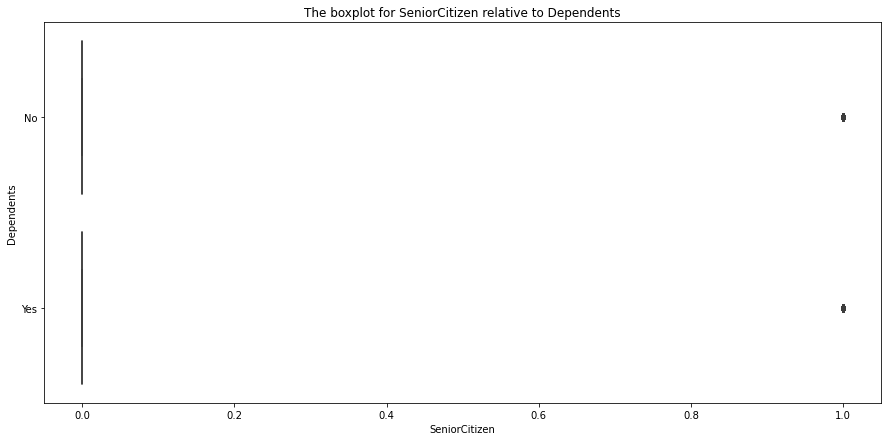

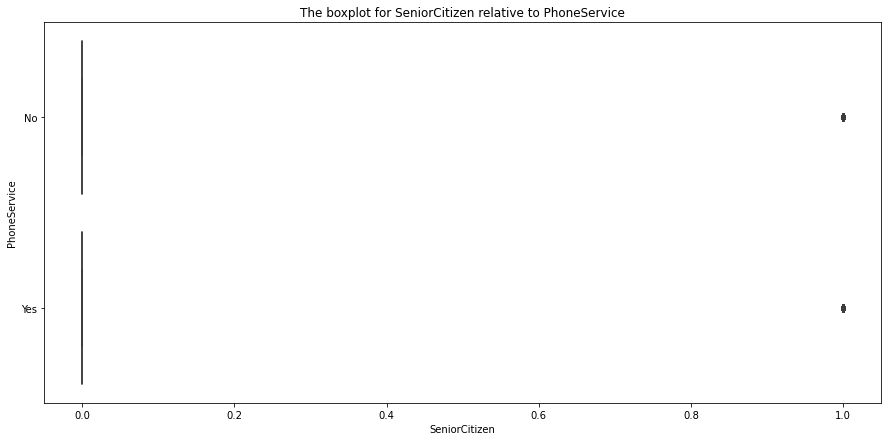

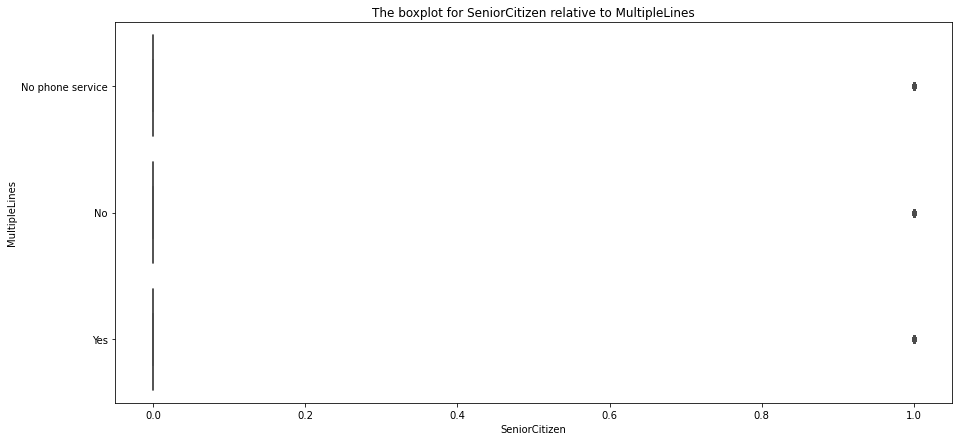

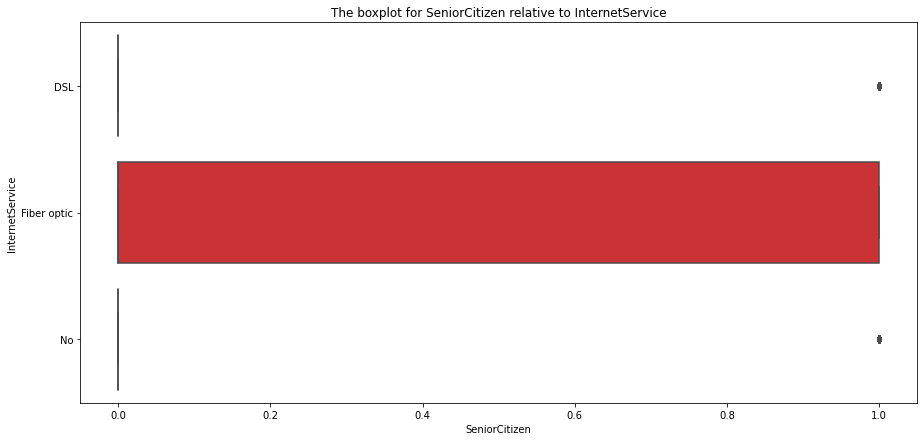

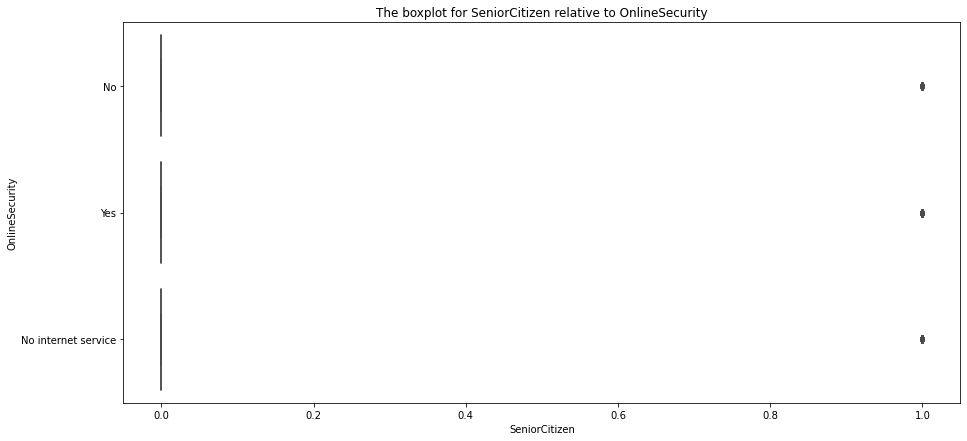

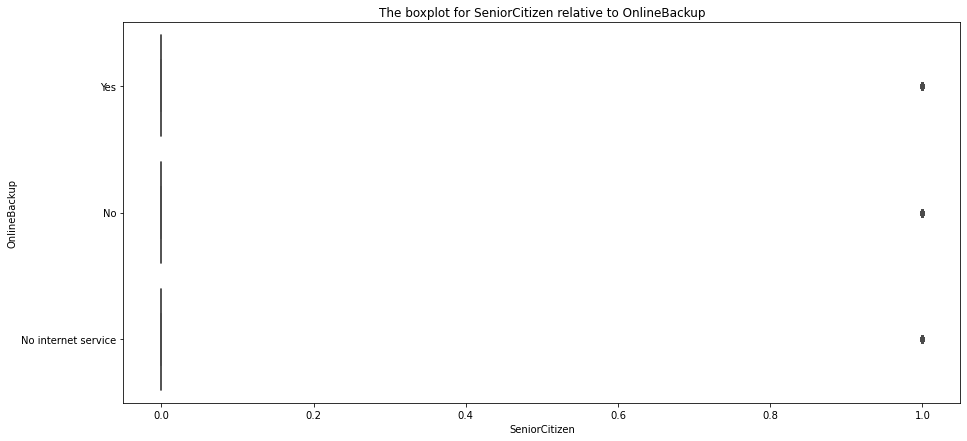

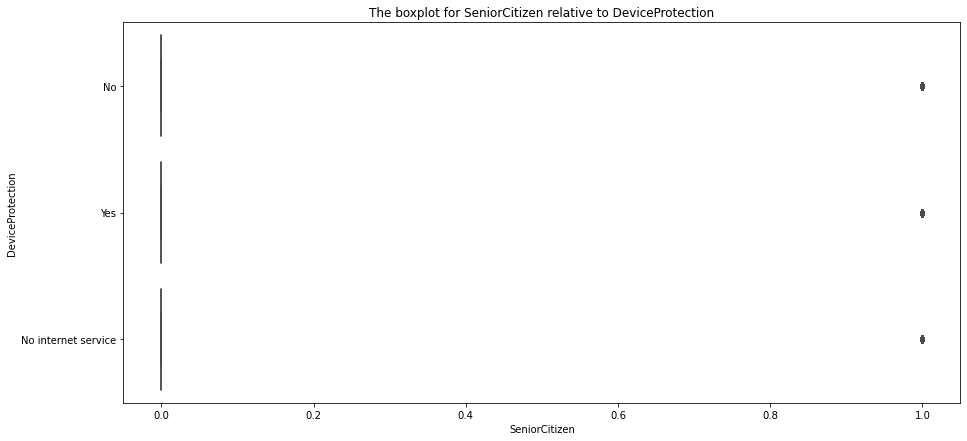

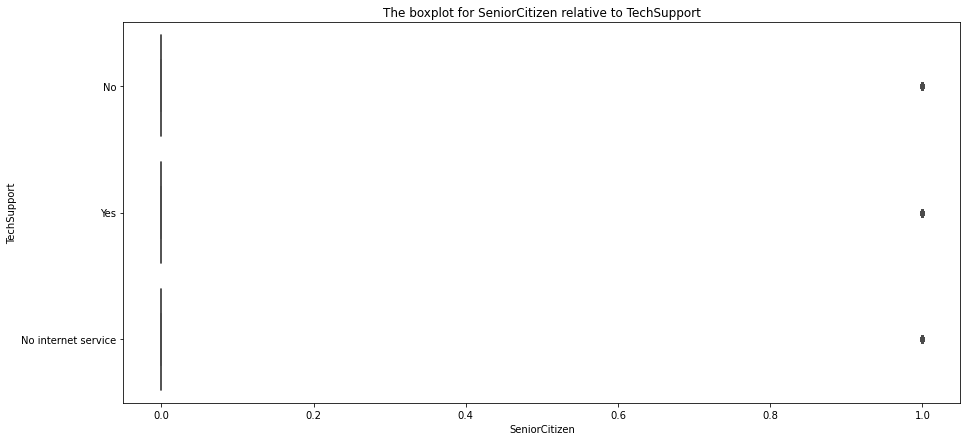

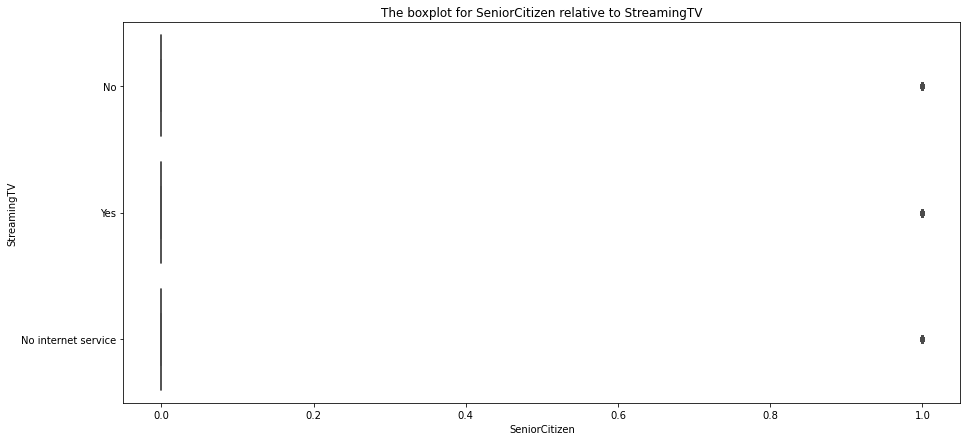

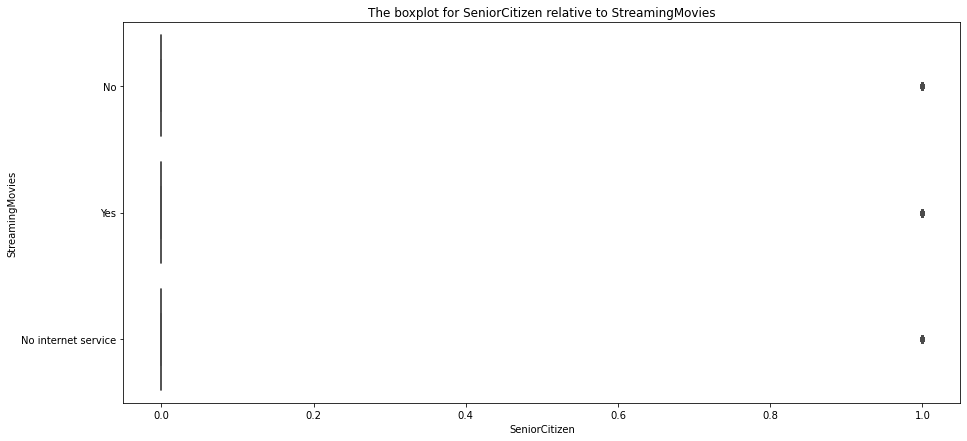

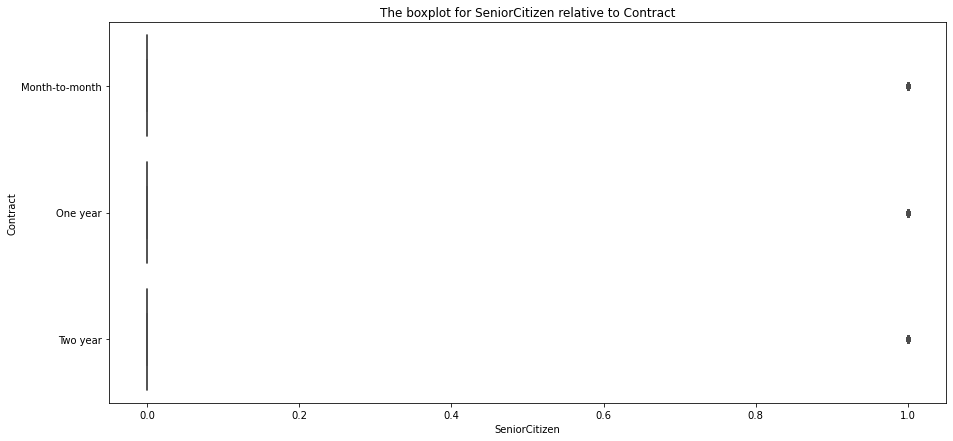

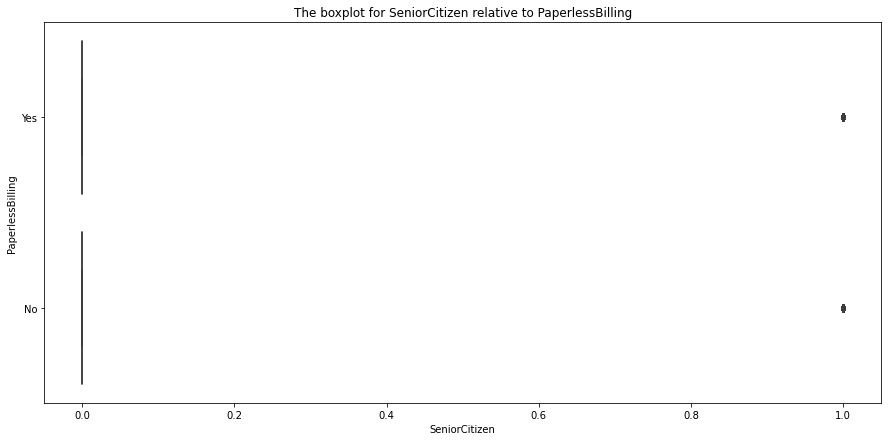

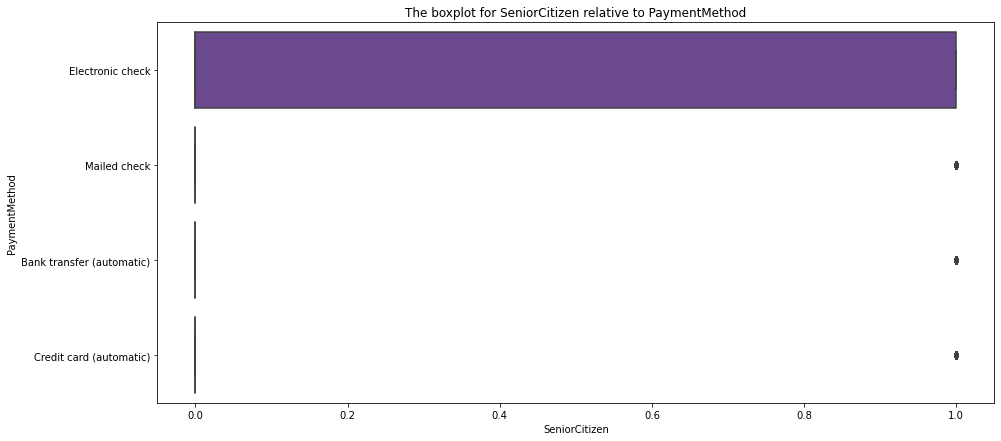

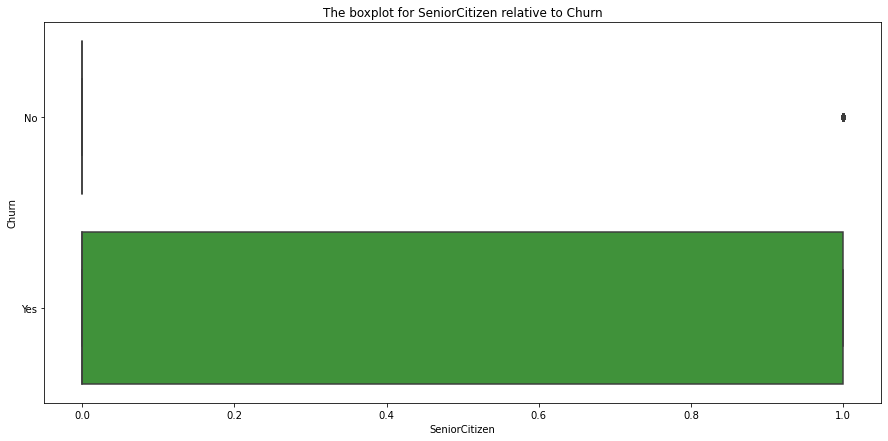

In [94]:
for variable in categorical_data[1:]:
    box_plot(data,numerical_columns[0],variable)

### Categorical data analysis only

In [79]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2):
    plt.figure(figsize=(15,7))
    sns.countplot(x=item_1,data=data,palette="YlGnBu",hue=item_2)
    plt.ylabel("frequency")
    plt.show()

In [80]:
categorical_data

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

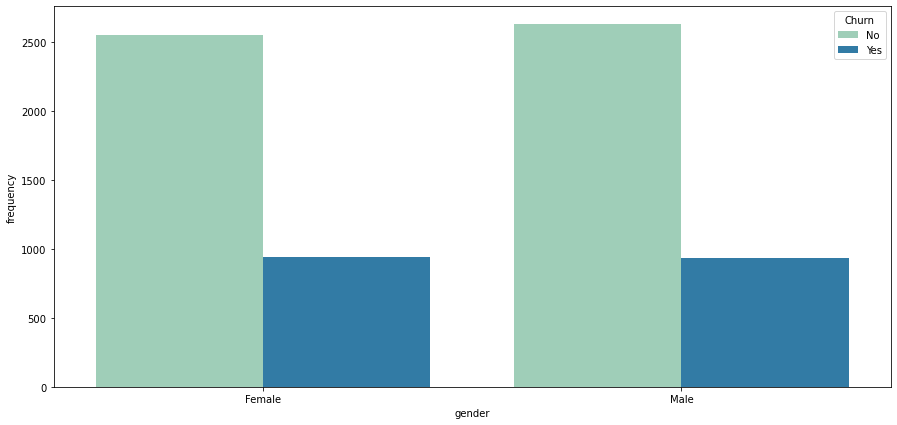

In [81]:
bivariate_plot(data,'gender','Churn')

In [88]:
round(data.groupby("gender")["Churn"].value_counts(normalize=True),3)*100 

gender  Churn
Female  No       73.1
        Yes      26.9
Male    No       73.8
        Yes      26.2
Name: Churn, dtype: float64

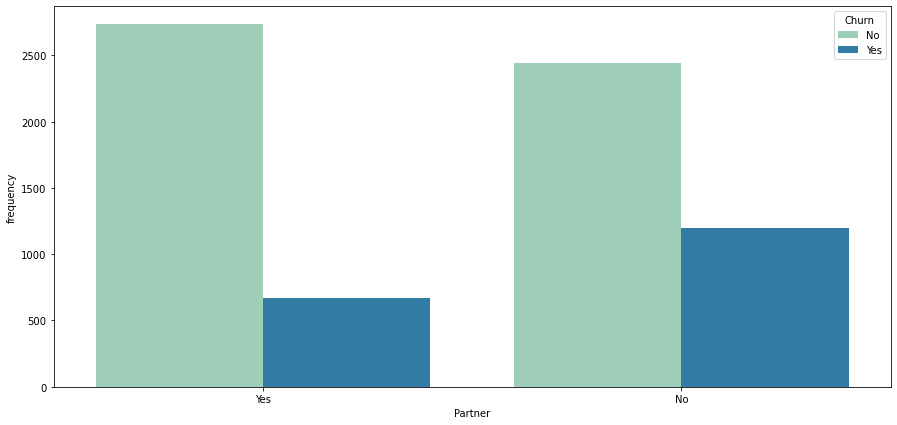

In [83]:
bivariate_plot(data,'Partner','Churn')

In [87]:
round(data.groupby("Partner")["Churn"].value_counts(normalize=True),3)*100 

Partner  Churn
No       No       67.0
         Yes      33.0
Yes      No       80.3
         Yes      19.7
Name: Churn, dtype: float64

#### Observation:

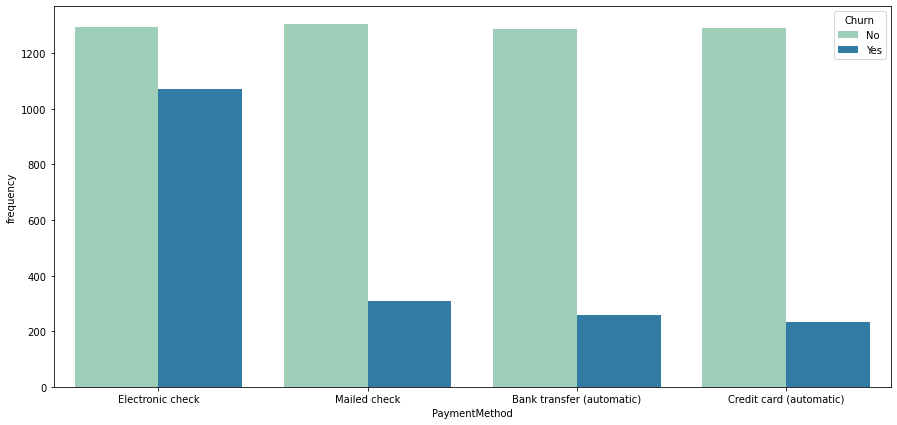

In [85]:
bivariate_plot(data,'PaymentMethod','Churn')

In [86]:
round(data.groupby("PaymentMethod")["Churn"].value_counts(normalize=True),3)*100 

PaymentMethod              Churn
Bank transfer (automatic)  No       83.3
                           Yes      16.7
Credit card (automatic)    No       84.8
                           Yes      15.2
Electronic check           No       54.7
                           Yes      45.3
Mailed check               No       80.9
                           Yes      19.1
Name: Churn, dtype: float64

### Correlation matrix for numerical data only

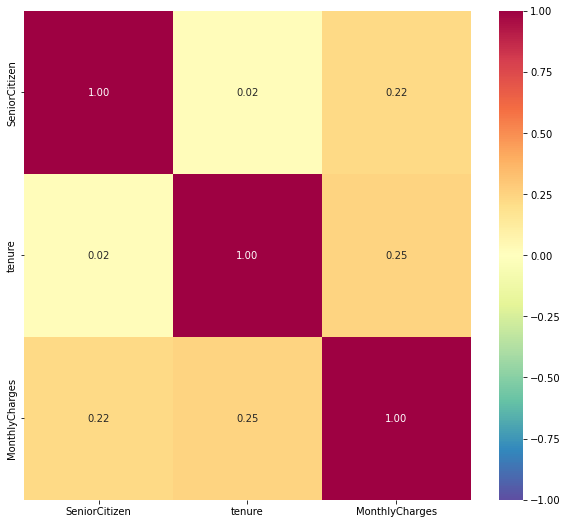

In [78]:
## First the correlation of numerical data
num_data = data.select_dtypes("number").columns    # create a list of numerical data
corr=data[num_data].corr() # calculate the correlation of the numerical dataset
# Plot the heatmap 
plt.figure(figsize=(10,9))  # increase the size of the plot
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, fmt=".2f",cbar=True,cmap="Spectral_r");

### Observation:
There is no strong positive correlation between the numerical dataset.

## Data Preprocessing

### Feature engineering

In [8]:
telecom_data=data.copy()  # copy the original dataset to avoid changing the original dataset

In [9]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [10]:
# drop the customer ID column
telecom_data.drop(["customerID"],axis=1,inplace=True) 

In [11]:
# Now print the first five rows of the dataset to check if the customer Id is dropped.
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


### Convert categorical  to numerical variables

In [12]:
# Select object data columns
object_columns = telecom_data.select_dtypes("object").columns

In [13]:
#Code to replace the categorical data with binary numbers starting from zero
for cols in object_columns:
    telecom_data[cols]=pd.factorize(telecom_data[cols])[0]  

In [14]:
# Now print the first five rows to check if conversion is done
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,1


### Scaling of the dataset

In [15]:
# First seperate the feature and target variable
X_data =telecom_data.drop(["Churn"],axis=1)
y_data =telecom_data["Churn"]

In [16]:
## First intantiate the standardScaler
scaler =StandardScaler()

In [17]:
# Fit and transform the dataset
scaled_data =scaler.fit_transform(X_data)

In [18]:
# Now create a pandas Dataframe using the scaled data and adding the columns names
df = pd.DataFrame(scaled_data,columns=X_data.columns)

In [19]:
# Print the first five rows to check if scalling was done
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.009559,-0.439916,-1.034530,-0.654012,-1.277445,-3.054010,-2.061669,-1.183234,-0.903589,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,-1.160323
1,0.990532,-0.439916,0.966622,-0.654012,0.066327,0.327438,-0.505697,-1.183234,0.351386,0.173655,0.286059,-0.909172,-1.071457,-1.07821,0.371271,1.205113,-0.274744,-0.259629
2,0.990532,-0.439916,0.966622,-0.654012,-1.236724,0.327438,-0.505697,-1.183234,0.351386,-1.180777,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-0.274744,-0.362660
3,0.990532,-0.439916,0.966622,-0.654012,0.514251,-3.054010,-2.061669,-1.183234,0.351386,0.173655,0.286059,0.347362,-1.071457,-1.07821,0.371271,1.205113,0.595711,-0.746535
4,-1.009559,-0.439916,0.966622,-0.654012,-1.236724,0.327438,-0.505697,0.172250,-0.903589,0.173655,-0.998016,-0.909172,-1.071457,-1.07821,-0.828207,-0.829798,-1.145198,0.197365


## Feature Selection and Extration

In [20]:
### Feature selection

In [21]:
from sklearn.decomposition import PCA

In [22]:
# Create a PCA that will retain 95% of the variance
pca =PCA(n_components=0.95 ,whiten=True)

In [23]:
data_pca =pca.fit_transform(df)

In [24]:
df.shape

(7043, 18)

In [25]:
print(data_pca.shape)

(7043, 14)


In [26]:
df1=pd.DataFrame(data_pca)  # set the pca-data as dataframe

In [27]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.143122,-1.562819,1.983945,-0.210765,1.442498,1.205763,-0.831951,-0.642379,-1.852220,0.528004,0.640882,-0.355594,-0.548987,0.033387
1,-0.367658,-0.462555,0.501792,0.340683,-1.467593,-1.140691,0.919186,-0.773620,0.515305,1.316223,0.103651,0.005843,0.835824,1.659722
2,-0.963392,-0.915475,0.024215,-0.043743,-0.792189,-0.975701,-0.776128,0.354534,0.401179,1.009215,2.382781,-0.153103,0.366347,-0.577305
3,-0.164367,-1.076878,2.570395,1.531139,-0.516209,-1.061493,0.382364,-0.485667,0.028117,0.159798,-0.447284,-1.415145,0.676176,0.879652
4,-0.901718,-1.164008,-0.663866,-0.366799,-0.383327,1.022849,-0.741395,-0.293939,0.172091,0.733106,-0.622277,0.995404,1.315798,0.178272


In [28]:
# Code to concatenate the target series dataset and df1
final_data = pd.concat([y_data,df1],axis=1)

In [29]:
final_data.head()

,Churn,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,-1.143122,-1.562819,1.983945,-0.210765,1.442498,1.205763,-0.831951,-0.642379,-1.852220,0.528004,0.640882,-0.355594,-0.548987,0.033387
1,0,-0.367658,-0.462555,0.501792,0.340683,-1.467593,-1.140691,0.919186,-0.773620,0.515305,1.316223,0.103651,0.005843,0.835824,1.659722
2,1,-0.963392,-0.915475,0.024215,-0.043743,-0.792189,-0.975701,-0.776128,0.354534,0.401179,1.009215,2.382781,-0.153103,0.366347,-0.577305
3,0,-0.164367,-1.076878,2.570395,1.531139,-0.516209,-1.061493,0.382364,-0.485667,0.028117,0.159798,-0.447284,-1.415145,0.676176,0.879652
4,1,-0.901718,-1.164008,-0.663866,-0.366799,-0.383327,1.022849,-0.741395,-0.293939,0.172091,0.733106,-0.622277,0.995404,1.315798,0.178272


## Visualization

In [65]:
# Create the correlation matrix
corr = final_data.corr()
print(corr);

               0             1             2             3             4  \
0   1.000000e+00 -1.791953e-15 -1.417971e-16 -2.167788e-18 -1.805916e-15   
1  -1.791953e-15  1.000000e+00 -3.272079e-15  5.639592e-15 -4.896317e-15   
2  -1.417971e-16 -3.272079e-15  1.000000e+00  1.297676e-15 -2.862764e-15   
3  -2.167788e-18  5.639592e-15  1.297676e-15  1.000000e+00  4.679223e-15   
4  -1.805916e-15 -4.896317e-15 -2.862764e-15  4.679223e-15  1.000000e+00   
5  -4.791443e-16 -6.960887e-16 -2.973196e-17  1.128448e-15 -1.558916e-15   
6  -8.589645e-16 -1.605141e-15 -1.187648e-15  1.858213e-15  2.224545e-17   
7  -4.332306e-16 -7.104276e-16 -4.188236e-16  2.190964e-16  8.654994e-16   
8   1.772207e-15  6.621498e-15  3.653116e-15 -6.948133e-15  5.686811e-15   
9  -8.370329e-16 -2.028817e-15 -1.369972e-15  2.342343e-15 -1.198328e-15   
10 -6.428971e-16  2.920602e-17 -1.454190e-16  3.655443e-16  4.063421e-16   
11 -3.602470e-16 -1.019570e-15 -6.800207e-16  4.445937e-16 -3.214318e-16   
12  4.216782

C:\Users\mashe\AppData\Local\Temp\ipykernel_2152\475893338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_data.corr()


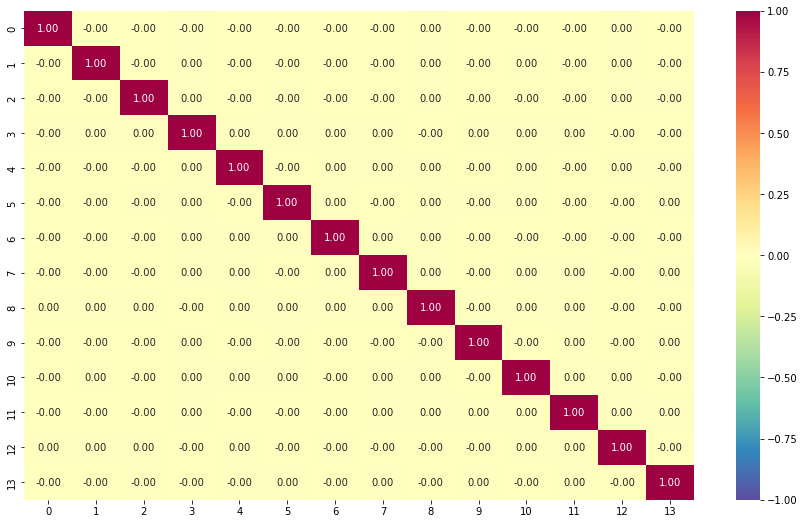

In [66]:
# Plot the heatmap 
plt.figure(figsize=(15,9))  # increase the size of the plot
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, fmt=".2f",cbar=True,cmap="Spectral_r");

In [71]:
## Create a function to display the bar graphs for categorical data columns
def count_plot1(data,item):
    plt.figure(figsize=(8,5))  # increase the size of the plot
    sns.countplot(data , x=item); # countplot for categorical columns
    plt.title(f"Countplot for {item}")  # add the title on the countplot
    plt.ylabel("frequency")    # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

C:\Users\mashe\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


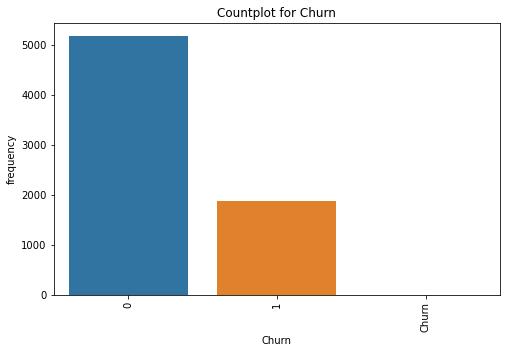

In [72]:
count_plot1(y_data,"Churn")

In [49]:
final_data["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [31]:
final_data["Churn"].shape[0]

7043

In [32]:
values=[]  # create an empty list
churned=[0,1]
for item in churned:
    count1= (final_data[final_data["Churn"]==item].value_counts().sum())/data["Churn"].shape[0]
    values.append(count1)

In [33]:
print(values)

[0.7346301292063041, 0.2653698707936959]


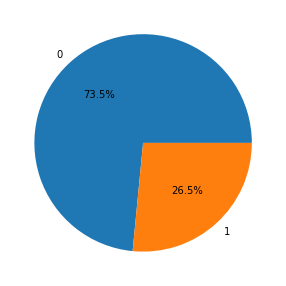

In [37]:
# Create a pie chart to show the percentage for churn
plt.figure(figsize=(5,5))
plt.pie(values,labels=["0","1"],autopct="%1.1f%%")
plt.show()